In [1]:
import sys
import numpy as np
import pandas as pd
import pickle
import json

In [2]:
"""
   Read the training df
"""
df_scores_all = pd.read_pickle("SCORES.pkl.gz")

In [3]:
with open("config.json", "r") as f:
    p = json.load(f)

In [4]:
max_tm_scores = np.maximum(df_scores_all["TM1"], df_scores_all["TM2"])
df_scores_all["distance"] = 1 - max_tm_scores
max_seq_len = p["MAX_SEQ_LEN"]
print("Discarding pairs >{} residues.".format(max_seq_len))
print("Min TMscore:", p['TMSCORE_CUTOFF'])
# Select the training set.
length_filter = (df_scores_all.qlen <= max_seq_len) & (df_scores_all.tlen <= max_seq_len)
pidentity_filter = (df_scores_all.pidentity < 98.5)
tm_score_filter = (df_scores_all.distance < (1 - p["TMSCORE_CUTOFF"]))

Discarding pairs >400 residues.
Min TMscore: 0.0


In [7]:
train_filter = length_filter & tm_score_filter & pidentity_filter & (df_scores_all.train_or_holdout == 0) 
holdout_filter = length_filter & tm_score_filter & (df_scores_all.train_or_holdout == 3)

In [9]:
N_HOLDOUTS = len(df_scores_all[holdout_filter])
TRAIN_SAMPLE_SIZE = 100000
HOLDOUT_SAMPLE_SIZE = 100000 if(N_HOLDOUTS > 100000) else N_HOLDOUTS

df_complete_train = df_scores_all[train_filter].reset_index(drop=True)
df_mini_train = df_scores_all[train_filter].sample(TRAIN_SAMPLE_SIZE).reset_index(drop=True)
df_mini_holdout = df_scores_all[holdout_filter].sample(HOLDOUT_SAMPLE_SIZE).reset_index(drop=True)

In [10]:
print("Training set size {:,}".format(len(df_mini_train)))
print("Holdout set size {:,}".format(len(df_mini_holdout)))

Training set size 100,000
Holdout set size 65,714


In [11]:
df_mini_train.pidentity.hist()

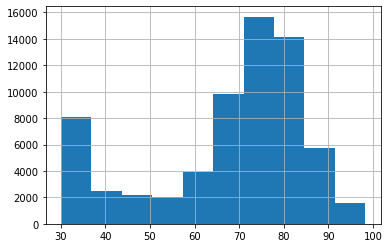

In [12]:
df_mini_holdout.pidentity.hist()

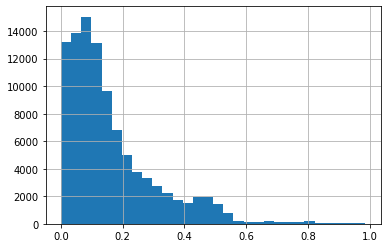

In [13]:
df_mini_train.distance.hist(bins=30)

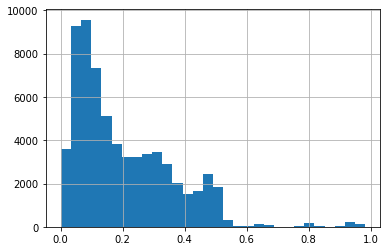

In [14]:
df_mini_holdout.distance.hist(bins=30)

In [15]:
df_mini_train.to_pickle("SCORES_MINI_TRAIN.pkl.gz")
df_mini_holdout.to_pickle("SCORES_MINI_HOLDOUT.pkl.gz")